In [9]:
import pandas as pd

df=pd.read_csv("C:\\Projects\\DataAnalysisProjects\\EmployeeAttritionAndEngagementAnalysis\\Cleaned_HR_Analytics.csv")

attrition_by_dept=df[df['Attrition']=='Yes'].groupby('Department')['EmpID'].count().reset_index()

total_by_dept=df.groupby('Department')['EmpID'].count().reset_index()

dept_attrition=pd.merge(attrition_by_dept,total_by_dept,on='Department',suffixes=('_Attrition','_Total'))

dept_attrition['AttritionRate (%)']=round((dept_attrition['EmpID_Attrition']/dept_attrition['EmpID_Total'])*100,2)

print(dept_attrition)


               Department  EmpID_Attrition  EmpID_Total  AttritionRate (%)
0         Human Resources               12           63              19.05
1  Research & Development              133          967              13.75
2                   Sales               93          450              20.67


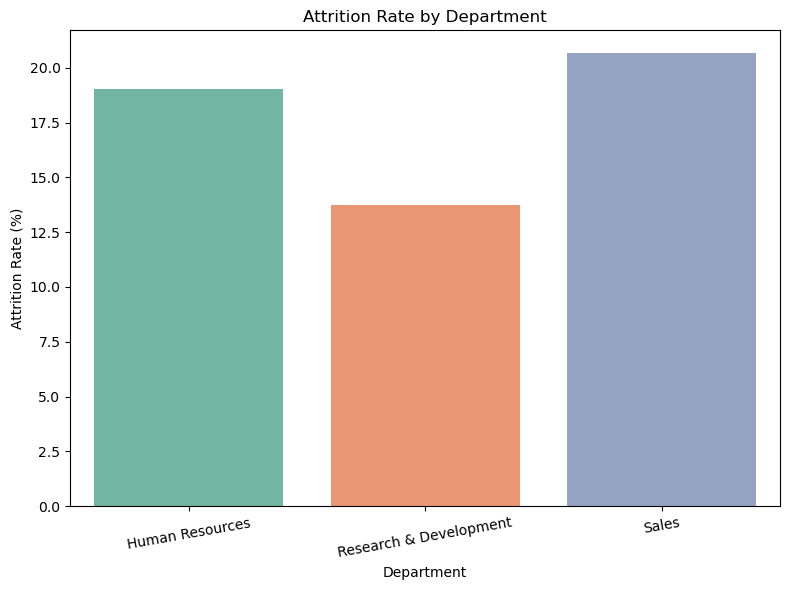

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.barplot(
    data=dept_attrition,
    x='Department',
    y='AttritionRate (%)',
    hue='Department',               
    palette='Set2',
    dodge=False                     
)

plt.title('Attrition Rate by Department')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department')
plt.xticks(rotation=10)
plt.legend([], [], frameon=False)   
plt.tight_layout()
plt.show()


📊 Attrition Rate by Department
The bar chart above displays the attrition rate across different departments:

Sales department shows the highest attrition rate at 20.67%,
nex
Followed by Human Resources with 19.05%,

While Research & Development has the lowest attrition rate at 13.75%.

This analysis indicates that employees in the Sales department are more likely to leave, suggesting potential issues related to workload, targets, or job satisfaction. On the other hand, R&D may have better employee retention practices or job engagement.

Why Does Sales Have a Higher Attrition Rate Than R&D?
Although Research & Development had more employees leave in total (133 people), the Sales department had a higher attrition rate. Here's why:

📊 Attrition Rate Formula:
Attrition Rate (%) = (Employees Who Left ÷ Total Employees in Department) × 100

🧮 Calculations:
R&D: 133 left out of 967 →
(133 / 967) × 100 ≈ 13.75%

Sales: 93 left out of 450 →
(93 / 450) × 100 ≈ 20.67%

🎯 Explanation:
Even though R&D had more leavers, it also has many more employees.
Sales is a smaller department, so losing 93 people means a larger share of the team is leaving.

This is why Sales shows the highest attrition rate — not because more people left, but because more left per 100 employees.

In [25]:
job_attrition=df.groupby('JobRole').agg(
    EmpID_Attrition=('Attrition', lambda x:(x=='Yes').sum()),
    EmpID_Total=('Attrition','count')
).reset_index()

job_attrition['AttritionRate (%)']=(job_attrition['EmpID_Attrition']/job_attrition['EmpID_Total'])*100
job_attrition.sort_values('AttritionRate (%)',ascending=False, inplace=True)
print(job_attrition)

                     JobRole  EmpID_Attrition  EmpID_Total  AttritionRate (%)
8       Sales Representative               33           84          39.285714
2      Laboratory Technician               62          261          23.754789
1            Human Resources               12           52          23.076923
7            Sales Executive               58          329          17.629179
6         Research Scientist               47          293          16.040956
0  Healthcare Representative                9          132           6.818182
4     Manufacturing Director               10          147           6.802721
3                    Manager                5          102           4.901961
5          Research Director                2           80           2.500000


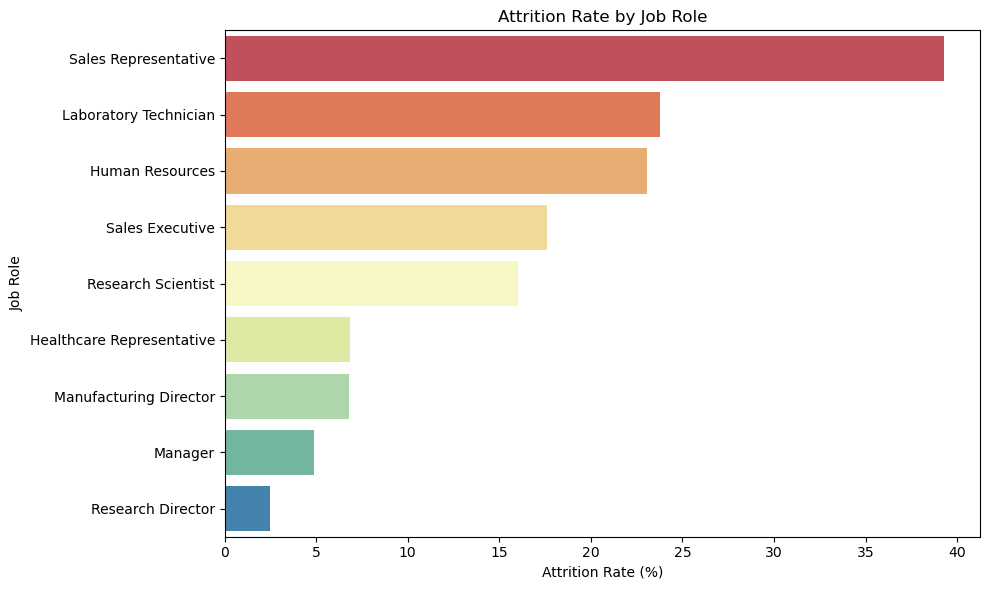

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=job_attrition,
    x='AttritionRate (%)',
    y='JobRole',
    hue='JobRole',
    palette='Spectral',
    dodge=False 
)

plt.title('Attrition Rate by Job Role')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()



### 📊 Attrition Rate by Job Role

This analysis presents the percentage of employees who left the organization across different job roles.

#### 🔍 Key Observations:

- The **Sales Representative** role shows the **highest attrition rate** at **39.29%**, which is significantly higher than any other role. This suggests potential challenges such as job pressure, unrealistic targets, or lack of growth opportunities in that role.
  
- **Laboratory Technicians** (23.75%) and **Human Resources** staff (23.08%) also show elevated attrition rates, indicating possible dissatisfaction or lack of support in those areas.

- On the other hand, strategic and senior roles like **Research Director** (2.5%) and **Manager** (4.90%) show the **lowest attrition rates**, suggesting better retention, possibly due to job security, influence, or compensation.

- Roles such as **Sales Executive** (17.63%) and **Research Scientist** (16.04%) are in the **moderate-risk zone**, where retention strategies may still be helpful.

#### 📌 Recommendation:

> ✔️ Focus on conducting exit interviews and engagement surveys for **Sales Representatives** and **Lab Technicians** to uncover specific causes of high turnover.  
> ✔️ Consider role-specific strategies such as career path planning, mentoring, workload balance, and compensation benchmarking to reduce attrition in these areas.



In [37]:
age_attrition=df.groupby('AgeGroup').agg(
    EmpID_Attrition=('Attrition', lambda x:(x=='Yes').sum()),
    EmpID_Total=('Attrition', 'count')
).reset_index()

age_attrition['AttritionRate (%)']=(age_attrition['EmpID_Attrition']/age_attrition['EmpID_Total'])*100
age_attrition.sort_values('AttritionRate (%)',ascending=False,inplace=True)
print(age_attrition)

  AgeGroup  EmpID_Attrition  EmpID_Total  AttritionRate (%)
0    18-25               44          123          35.772358
1    26-35              116          611          18.985270
4      55+                8           47          17.021277
3    46-55               27          228          11.842105
2    36-45               43          471           9.129512


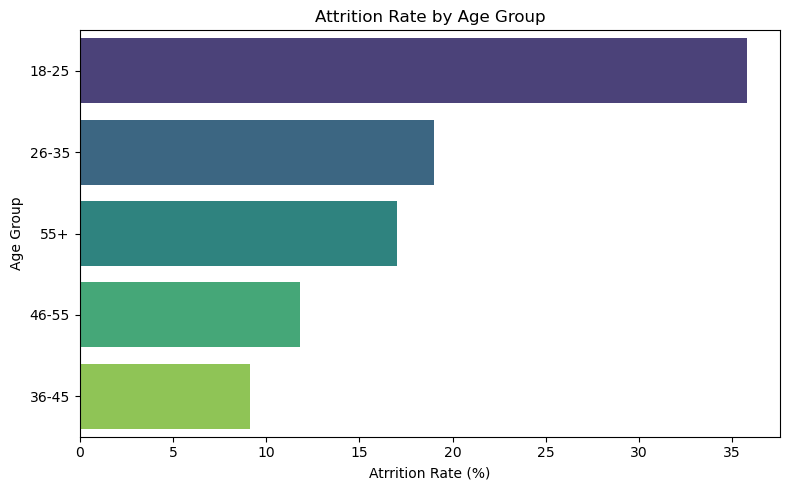

In [53]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=age_attrition,
    x='AttritionRate (%)',
    y='AgeGroup',
    hue='AgeGroup',
    palette='viridis',
    dodge=False
)

plt.title('Attrition Rate by Age Group')
plt.xlabel('Atrrition Rate (%)')
plt.ylabel('Age Group')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

### 📊 Attrition Rate by Age Group

This chart illustrates the attrition rate across different employee age groups.

#### 🔍 Key Observations:

- The **18–25 age group** has the **highest attrition rate** at **35.77%**, suggesting that **younger employees are more likely to leave**, possibly due to career exploration, lack of job fit, or early dissatisfaction.
  
- The **26–35 group** also shows a notable attrition rate of **18.99%**, indicating early-career challenges may persist beyond entry-level roles.

- Interestingly, the **55+ age group** has an attrition rate of **17.02%**, which might reflect retirements or pre-retirement transitions.

- Employees in the **36–45** and **46–55** age groups have **lower attrition rates** at **9.13%** and **11.84%**, suggesting stronger job stability or satisfaction during mid-career.

#### 📌 Recommendation:

> ✔️ Focus on enhancing **onboarding, mentorship, and career development** for younger employees (especially under 35).  
> ✔️ Investigate whether roles for older employees align with **retirement planning and engagement** needs.  
> ✔️ Consider conducting **age-specific exit interviews** to better understand the motivations behind attrition in different life stages.


In [59]:
salary_attrition=df.groupby('SalarySlab').agg(
    EmpID_Attrition=('Attrition', lambda x:(x=='Yes').sum()),
    EmpID_Total=('Attrition','count')
).reset_index()

salary_attrition['AttritionRate (%)']=(salary_attrition['EmpID_Attrition']/salary_attrition['EmpID_Total'])*100
salary_attrition.sort_values('AttritionRate (%)', ascending=False, inplace=True)
print(salary_attrition)

  SalarySlab  EmpID_Attrition  EmpID_Total  AttritionRate (%)
3    Upto 5k              163          753          21.646746
0    10k-15k               21          150          14.000000
2     5k-10k               49          444          11.036036
1       15k+                5          133           3.759398


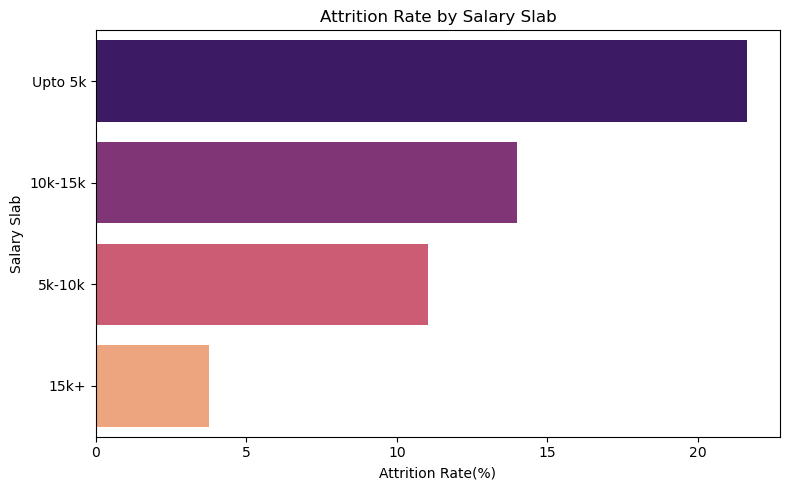

In [63]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=salary_attrition,
    x='AttritionRate (%)',
    y='SalarySlab',
    hue='SalarySlab',
    palette='magma',
    dodge=False
)

plt.title('Attrition Rate by Salary Slab')
plt.xlabel('Attrition Rate(%)')
plt.ylabel('Salary Slab')
plt.legend([],[],frameon=False)
plt.tight_layout()
plt.show()

### 💰 Attrition Rate by Salary Slab

This chart explores how employee attrition varies across different monthly salary slabs.

#### 🔍 Key Observations:

- Employees earning **up to ₹5,000** show the **highest attrition rate** at **21.65%**, suggesting that **low pay may be a major driver of turnover**.
- Those earning between **₹10,000–15,000** and **₹5,000–10,000** show **moderate attrition rates** at **14.00%** and **11.04%**, respectively.
- The lowest attrition is seen in employees earning **above ₹15,000**, with a rate of only **3.76%**.

#### 📌 Interpretation:

> ✔️ There's a **clear inverse relationship** between salary level and attrition rate — as salary increases, attrition tends to decrease.  
> ✔️ This suggests that **financial dissatisfaction** or **better-paying opportunities elsewhere** could be key reasons for employee exits, especially among lower-income groups.

#### ✅ Recommendation:

- **Review compensation policies**, especially for roles in the lowest income slab.
- Consider introducing **performance-based incentives**, **early growth paths**, or **cost-of-living adjustments** for employees earning less than ₹10,000/month.


In [73]:
overtime_attrition=df.groupby('OverTime').agg(
    EmpID_Attrition=('Attrition',lambda x:(x=='Yes').sum()),
    EmpID_Total=('Attrition','count')
).reset_index()

overtime_attrition['AttritionRate (%)']=(overtime_attrition['EmpID_Attrition']/overtime_attrition['EmpID_Total'])*100
overtime_attrition.sort_values('AttritionRate (%)', ascending=False, inplace=True)
print(overtime_attrition)

  OverTime  EmpID_Attrition  EmpID_Total  AttritionRate (%)
1      Yes              128          418          30.622010
0       No              110         1062          10.357815


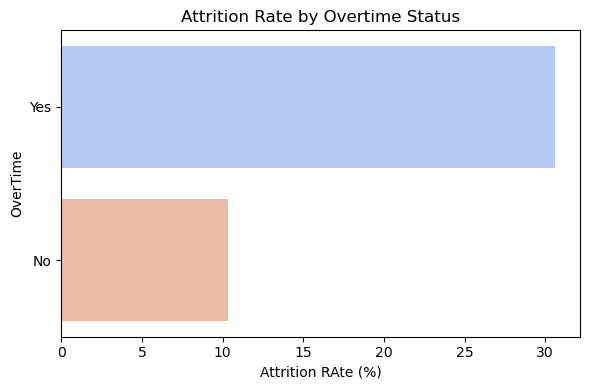

In [81]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=overtime_attrition,
    x='AttritionRate (%)',
    y='OverTime',
    hue='OverTime',
    palette='coolwarm',
    dodge=False
)

plt.title('Attrition Rate by Overtime Status')
plt.xlabel('Attrition RAte (%)')
plt.ylabel('OverTime')
plt.legend([],[],frameon=False)
plt.tight_layout()
plt.show()

In [83]:
travel_attrition = df.groupby('BusinessTravel').agg(
    EmpID_Attrition=('Attrition', lambda x: (x == 'Yes').sum()),
    EmpID_Total=('Attrition', 'count')
).reset_index()

travel_attrition['AttritionRate (%)'] = (travel_attrition['EmpID_Attrition'] / travel_attrition['EmpID_Total']) * 100
travel_attrition.sort_values('AttritionRate (%)', ascending=False, inplace=True)
travel_attrition


,BusinessTravel,EmpID_Attrition,EmpID_Total,AttritionRate (%)
2,Travel_Frequently,69,279,24.731183
3,Travel_Rarely,157,1042,15.067179
0,Non-Travel,12,151,7.947020
1,TravelRarely,0,8,0.000000


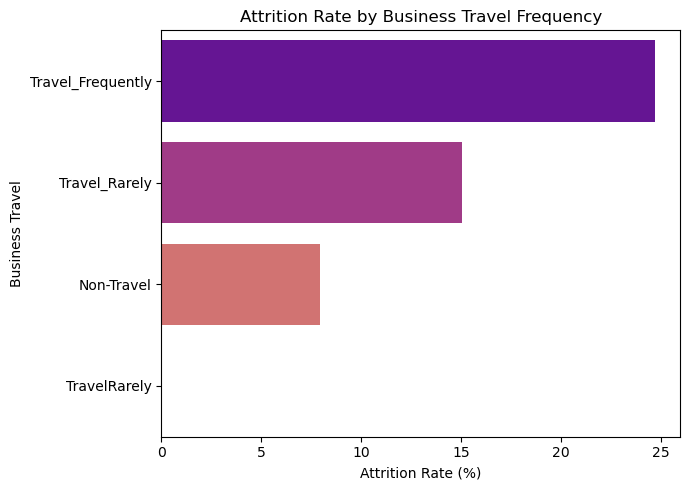

In [85]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=travel_attrition,
    x='AttritionRate (%)',
    y='BusinessTravel',
    hue='BusinessTravel',
    palette='plasma',
    dodge=False
)

plt.title('Attrition Rate by Business Travel Frequency')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Business Travel')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


### ✈️ Attrition Rate by Business Travel Frequency

This chart illustrates how employee attrition varies based on how frequently they travel for business purposes.

#### 🔍 Key Observations:

- Employees who **travel frequently** have the **highest attrition rate** at **24.73%**, indicating a possible link between **frequent travel and job dissatisfaction**.
- Those who **travel rarely** also show a noticeable attrition rate of **15.07%**.
- Employees who **do not travel** have a significantly lower attrition rate of **7.95%**.
- The group labeled **"TravelRarely"** shows **0% attrition**, but this is based on only **8 employees**, so the sample is too small to draw meaningful conclusions.

#### 📌 Interpretation:

> ✔️ There’s a **positive correlation** between travel frequency and attrition.  
> ✔️ Regular business travel may contribute to **stress**, **work-life imbalance**, or **burnout**, leading to higher turnover.

#### ✅ Recommendation:

- Review roles that involve **frequent travel** to ensure proper support and flexibility.
- Offer **travel incentives**, **mental wellness support**, or consider rotating heavy-travel roles to reduce stress.
- Standardize travel frequency labels (e.g., fix "TravelRarely") to avoid confusion in reporting.



In [87]:
edu_field_attrition = df.groupby('EducationField').agg(
    EmpID_Attrition=('Attrition', lambda x: (x == 'Yes').sum()),
    EmpID_Total=('Attrition', 'count')
).reset_index()

edu_field_attrition['AttritionRate (%)'] = (edu_field_attrition['EmpID_Attrition'] / edu_field_attrition['EmpID_Total']) * 100
edu_field_attrition.sort_values('AttritionRate (%)', ascending=False, inplace=True)
edu_field_attrition


,EducationField,EmpID_Attrition,EmpID_Total,AttritionRate (%)
0,Human Resources,7,27,25.925926
5,Technical Degree,32,132,24.242424
2,Marketing,36,161,22.360248
1,Life Sciences,89,607,14.662273
3,Medical,63,470,13.404255
4,Other,11,83,13.253012


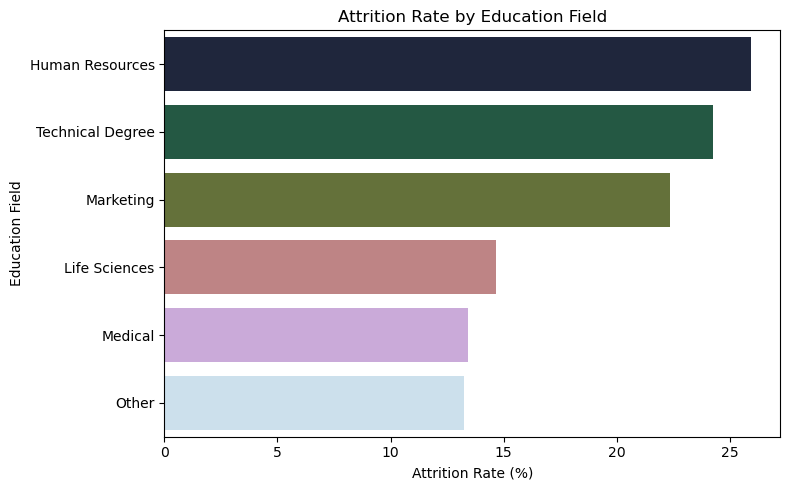

In [89]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=edu_field_attrition,
    x='AttritionRate (%)',
    y='EducationField',
    palette='cubehelix',
    hue='EducationField',
    dodge=False
)

plt.title('Attrition Rate by Education Field')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Education Field')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


### 🎓 Attrition Rate by Education Field

This chart analyzes how attrition varies based on employees' education backgrounds.

#### 🔍 Key Observations:

- Employees from a **Human Resources** background show the **highest attrition rate** at **25.93%**.
- Those with a **Technical Degree** follow closely at **24.24%**, and **Marketing** professionals at **22.36%**.
- The lowest attrition is observed in the **"Other"**, **Medical**, and **Life Sciences** fields, ranging from **13.25% to 14.66%**.

#### 📌 Interpretation:

> ✔️ Employees with HR, technical, and marketing education fields are leaving at a higher rate.  
> ✔️ This could reflect **misalignment between expectations and roles**, or **limited growth opportunities** in those functions within the organization.

#### ✅ Recommendation:

- Conduct deeper analysis into roles held by employees from these fields.
- Design **career development paths**, **training programs**, or **role re-alignments** specifically for **HR, Marketing, and Technical Degree holders**.


In [91]:
marital_attrition = df.groupby('MaritalStatus').agg(
    EmpID_Attrition=('Attrition', lambda x: (x == 'Yes').sum()),
    EmpID_Total=('Attrition', 'count')
).reset_index()

marital_attrition['AttritionRate (%)'] = (marital_attrition['EmpID_Attrition'] / marital_attrition['EmpID_Total']) * 100
marital_attrition.sort_values('AttritionRate (%)', ascending=False, inplace=True)
marital_attrition


,MaritalStatus,EmpID_Attrition,EmpID_Total,AttritionRate (%)
2,Single,120,473,25.369979
1,Married,84,679,12.371134
0,Divorced,34,328,10.365854


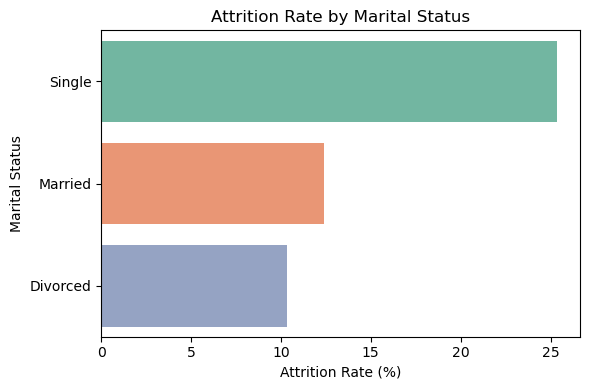

In [93]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=marital_attrition,
    x='AttritionRate (%)',
    y='MaritalStatus',
    palette='Set2',
    hue='MaritalStatus',
    dodge=False
)

plt.title('Attrition Rate by Marital Status')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Marital Status')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


### 💍 Attrition Rate by Marital Status

This chart explores how marital status influences employee attrition.

#### 🔍 Key Observations:

- **Single employees** have the **highest attrition rate** at **25.37%**, significantly higher than the other groups.
- **Married employees** show an attrition rate of **12.37%**.
- **Divorced employees** have the lowest attrition rate at **10.37%**.

#### 📌 Interpretation:

> ✔️ Being single is associated with a **higher risk of attrition**, possibly due to greater mobility, fewer family responsibilities, or openness to switching jobs for better opportunities.  
> ✔️ Married and divorced employees tend to stay longer, possibly due to **greater stability needs** or **dependents**.

#### ✅ Recommendation:

- Create **targeted retention strategies** for single employees, such as:
  - Career growth plans
  - Mentorship programs
  - Flexible work options
- Conduct **exit interviews** with single employees to better understand their reasons for leaving.


In [95]:
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace({
    1: 'Bad',
    2: 'Good',
    3: 'Very Good',
    4: 'Excellent'
})

envsatis_attrition = df.groupby('EnvironmentSatisfaction').agg(
    EmpID_Attrition=('Attrition', lambda x: (x == 'Yes').sum()),
    EmpID_Total=('Attrition', 'count')
).reset_index()

envsatis_attrition['AttritionRate (%)'] = (envsatis_attrition['EmpID_Attrition'] / envsatis_attrition['EmpID_Total']) * 100
envsatis_attrition.sort_values('AttritionRate (%)', ascending=False, inplace=True)
envsatis_attrition


,EnvironmentSatisfaction,EmpID_Attrition,EmpID_Total,AttritionRate (%)
0,Bad,72,284,25.352113
2,Good,43,291,14.776632
3,Very Good,62,454,13.656388
1,Excellent,61,451,13.525499


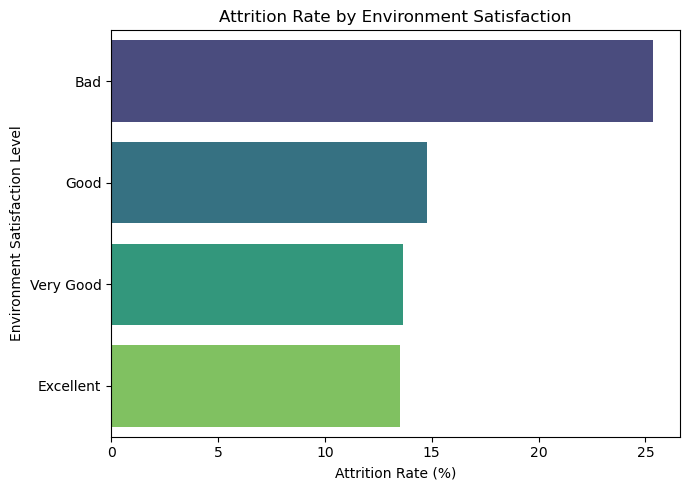

In [97]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=envsatis_attrition,
    x='AttritionRate (%)',
    y='EnvironmentSatisfaction',
    palette='viridis',
    hue='EnvironmentSatisfaction',
    dodge=False
)

plt.title('Attrition Rate by Environment Satisfaction')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Environment Satisfaction Level')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


### 🌿 Attrition Rate by Environment Satisfaction

This chart analyzes the relationship between employees' satisfaction with their work environment and their likelihood of leaving the organization.

#### 🔍 Key Observations:

- Employees who rated their environment as **"Bad"** have the **highest attrition rate** at **25.35%**.
- Attrition decreases as satisfaction increases:
  - **"Good"**: 14.78%
  - **"Very Good"**: 13.66%
  - **"Excellent"**: 13.53%

#### 📌 Interpretation:

> ✔️ There is a **clear negative correlation** between environment satisfaction and attrition — as satisfaction improves, employees are less likely to leave.  
> ✔️ Dissatisfaction with the work environment is a major driver of attrition.

#### ✅ Recommendation:

- Conduct **employee feedback surveys** to identify specific environment issues (e.g., poor facilities, culture, noise, lighting, ergonomics).
- Improve **workplace conditions** and promote a **positive and inclusive culture**.
- Recognize and reward teams with high environment satisfaction to **reinforce positive practices**.


In [115]:
bins = [0, 3, 6, 11, 21, df['YearsAtCompany'].max() + 1]
labels = ['0-2', '3-5', '6-10', '11-20', '21+']

df['CompanyTenureGroup'] = pd.cut(df['YearsAtCompany'], bins=bins, labels=labels, right=False)

tenure_attrition = df.groupby('CompanyTenureGroup', observed=True).agg(
    EmpID_Attrition=('Attrition', lambda x: (x == 'Yes').sum()),
    EmpID_Total=('Attrition', 'count')
).reset_index()

tenure_attrition['AttritionRate (%)'] = (tenure_attrition['EmpID_Attrition'] / tenure_attrition['EmpID_Total']) * 100
tenure_attrition.sort_values('AttritionRate (%)', ascending=False, inplace=True)

tenure_attrition


,CompanyTenureGroup,EmpID_Attrition,EmpID_Total,AttritionRate (%)
0,0-2,102,342,29.824561
1,3-5,61,439,13.895216
2,6-10,55,452,12.168142
4,21+,8,66,12.121212
3,11-20,12,181,6.629834


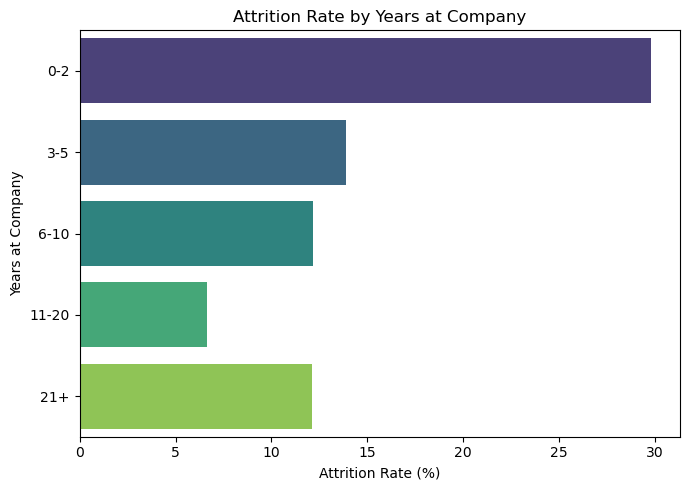

In [117]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=tenure_attrition,
    x='AttritionRate (%)',
    y='CompanyTenureGroup',
    palette='viridis',
    hue='CompanyTenureGroup',
    dodge=False
)

plt.title('Attrition Rate by Years at Company')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Years at Company')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()



### 🏢 Attrition Rate by Years at Company

This chart examines how long employees have stayed in the company before leaving.

#### 🔍 Key Observations:

- Employees who have been with the company for **0–2 years** have the highest attrition rate at **29.82%**.
- Attrition steadily declines as tenure increases:
  - **3–5 years**: 13.90%
  - **6–10 years**: 12.17%
  - **11–20 years**: 6.63%
  - **21+ years**: 12.12%

#### 📌 Interpretation:

> ✔️ Employees are **most likely to leave within their first 2 years**, indicating possible issues with onboarding, role fit, or expectations.  
> ✔️ Those who stay **beyond 5 years** show greater commitment and stability.

#### ✅ Recommendation:

- Strengthen onboarding and early-stage support.
- Monitor **new employees closely** during the first two years.
- Provide early career growth, mentorship, and feedback mechanisms to improve retention.
ce preventable exits.


In [111]:
bins = [0, 3, 6, 11, 21, df['TotalWorkingYears'].max() + 1]
labels = ['0-2', '3-5', '6-10', '11-20', '21+']

df['ExperienceGroup'] = pd.cut(df['TotalWorkingYears'], bins=bins, labels=labels, right=False)

exp_attrition = df.groupby('ExperienceGroup', observed=True).agg(
    EmpID_Attrition=('Attrition', lambda x: (x == 'Yes').sum()),
    EmpID_Total=('Attrition', 'count')
).reset_index()

exp_attrition['AttritionRate (%)'] = (exp_attrition['EmpID_Attrition'] / exp_attrition['EmpID_Total']) * 100
exp_attrition.sort_values('AttritionRate (%)', ascending=False, inplace=True)

# Display the table
exp_attrition


,ExperienceGroup,EmpID_Attrition,EmpID_Total,AttritionRate (%)
0,0-2,54,123,43.902439
1,3-5,37,195,18.974359
2,6-10,91,611,14.893617
3,11-20,40,343,11.661808
4,21+,16,208,7.692308


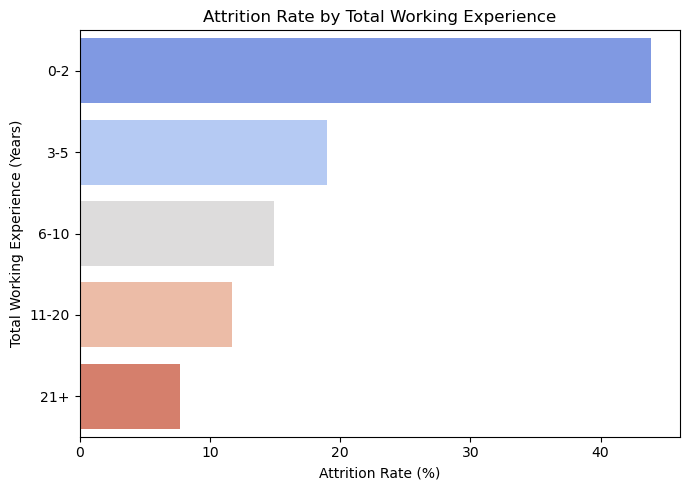

In [113]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=exp_attrition,
    x='AttritionRate (%)',
    y='ExperienceGroup',
    palette='coolwarm',
    hue='ExperienceGroup',
    dodge=False
)

plt.title('Attrition Rate by Total Working Experience')
plt.xlabel('Attrition Rate (%)')
plt.ylabel('Total Working Experience (Years)')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


### 💼 Attrition Rate by Total Working Experience

This analysis highlights how overall career experience relates to attrition risk.

#### 🔍 Key Observations:

- Employees with **0–2 years** of experience are the most likely to leave, with a very high **attrition rate of 43.90%**.
- The rate drops significantly as experience grows:
  - **3–5 years**: 18.97%
  - **6–10 years**: 14.89%
  - **11–20 years**: 11.66%
  - **21+ years**: 7.69%

#### 📌 Interpretation:

> ✔️ Less experienced employees are **more likely to leave**—possibly due to job hopping, adjusting expectations, or early career exploration.  
> ✔️ More experienced professionals show **greater loyalty and stability**, likely due to role fit, compensation, and career path clarity.

#### ✅ Recommendation:

- Focus on **early-career development** and engagement.
- Provide structured **career guidance**, **mentorship**, and **growth opportunities** in the first 2 years.
- Make first experiences meaningful to build commitment and reduce early exits.


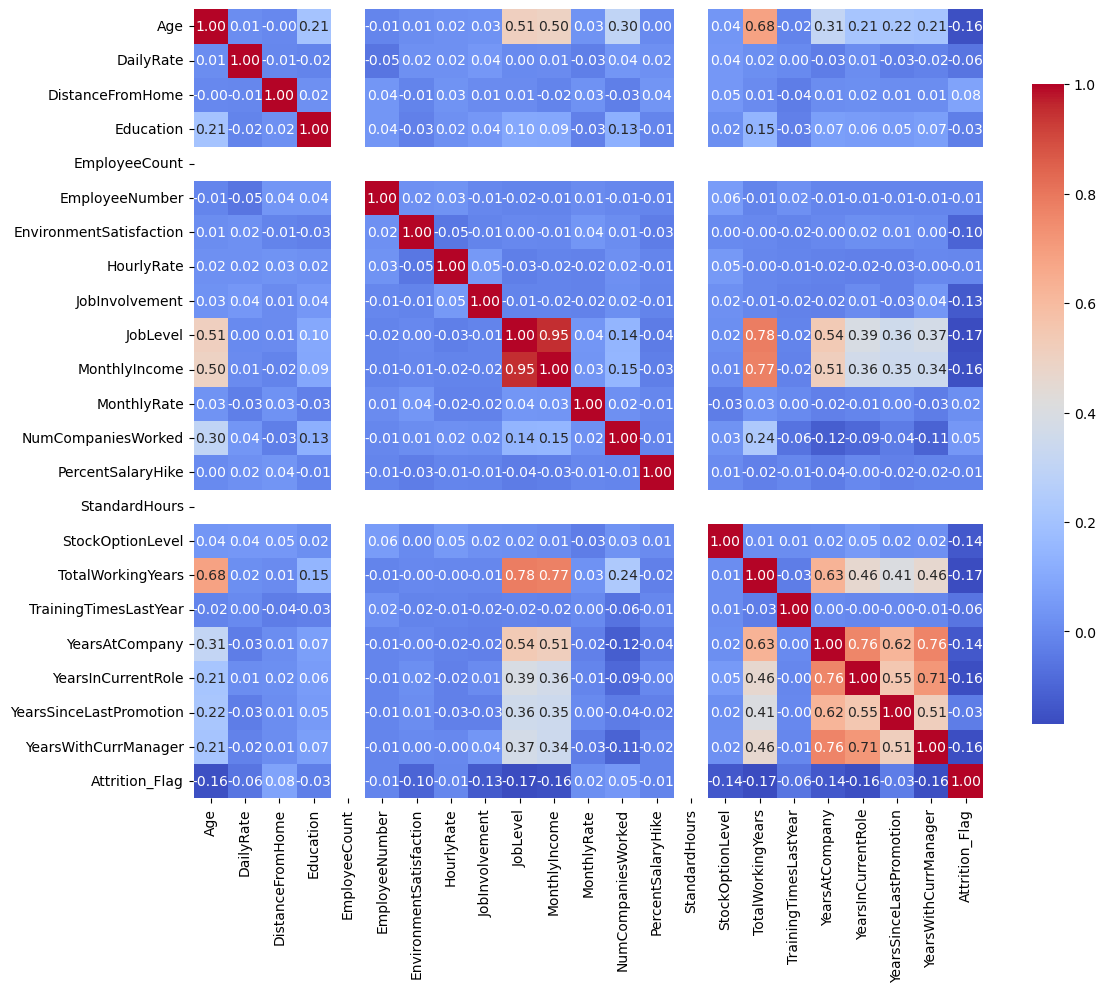

In [19]:
df['Attrition_Flag']=df['Attrition'].map({'Yes':1,'No':0})
numeric_cols=df.select_dtypes(include='number')

plt.figure(figsize=(12,10))
corr_matrix=numeric_cols.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink":.8}
)

plt.title=("Correlation Matrix (including Atrrition)")
plt.tight_layout()
plt.savefig("C:\\Projects\\DataAnalysisProjects\\EmployeeAttritionAndEngagementAnalysis\\correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# 📊 Employee Attrition Correlation Report

This section summarizes how different numerical features relate to employee attrition based on correlation values from the dataset.

---

### ✅ Interpretation Guide:

- **Negative correlation (−)** → Higher value = **less likely to leave**
- **Positive correlation (+)** → Higher value = **more likely to leave**
- **Near 0** → Little or **no effect**

---

### 🔍 Correlation Summary by Feature:

| Feature                     | Correlation | Interpretation                                                                 |
|-----------------------------|-------------|---------------------------------------------------------------------------------|
| **JobLevel**                | −0.17       | Higher-level employees are less likely to leave.                              |
| **TotalWorkingYears**       | −0.17       | More experienced employees are more stable.                                   |
| **MonthlyIncome**           | −0.16       | Higher earners are less likely to leave.                                      |
| **YearsInCurrentRole**      | −0.16       | Longer time in the same role = less likely to leave.                          |
| **YearsWithCurrManager**    | −0.16       | Longer relationships with managers reduce attrition.                          |
| **Age**                     | −0.16       | Older employees tend to stay longer.                                          |
| **StockOptionLevel**        | −0.14       | Employees with stock options are less likely to leave.                        |
| **YearsAtCompany**          | −0.14       | Long-tenure employees are more loyal.                                         |
| **JobInvolvement**          | −0.13       | More involved employees stay longer.                                          |
| **EnvironmentSatisfaction** | −0.10       | Less satisfied environments may increase attrition.                           |
| **DistanceFromHome**        | +0.08       | Slightly more likely to leave if living far from work.                        |
| **NumCompaniesWorked**      | +0.05       | People who worked at more companies may be slightly more likely to leave.     |
| **TrainingTimesLastYear**   | −0.06       | Very little impact on attrition.                                              |
| **DailyRate**               | −0.06       | No real relationship.                                                         |
| **PercentSalaryHike**       | −0.01       | Promotions don't significantly impact attrition.                              |
| **YearsSinceLastPromotion** | −0.03       | Very little to no effect.                                                     |
| **Education**               | −0.03       | Negligible impact.                                                            |
| **HourlyRate**              | −0.01       | No meaningful correlation.                                                    |
| **MonthlyRate**             | +0.02       | No impact on attrition.                                                       |

---

### ✅ Final Summary:

- The **strongest negative correlations** (most important to attrition) are:
  - `JobLevel`, `TotalWorkingYears`, `MonthlyIncome`, `YearsInCurrentRole`, `YearsWithCurrManager`, and `Age`.

- Features like `HourlyRate`, `Education`, `MonthlyRate`, and `SalaryHike` have **minimal or no influence**.

---

*This analysis helps identify which factors matter most in predicting employee attrition.*


TypeError: 'str' object is not callable

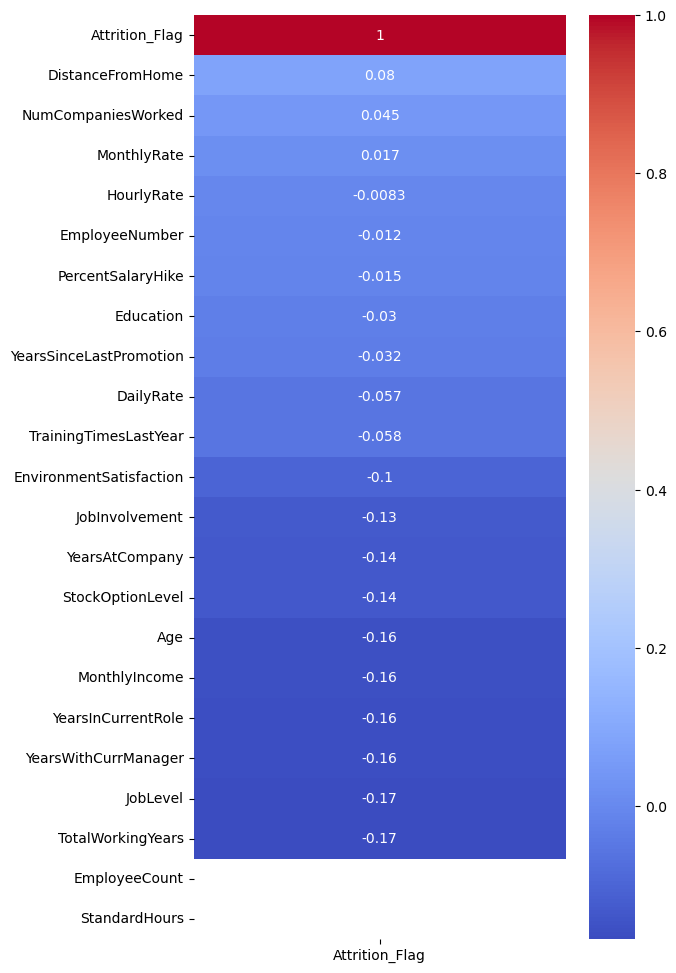

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
top_corr = corr[['Attrition_Flag']].sort_values(by='Attrition_Flag', ascending=False)

plt.figure(figsize=(6, 12))
sns.heatmap(top_corr, annot=True, cmap='coolwarm')
plt.title('Correlation with Attrition_Flag')
plt.show()
